<a href="https://colab.research.google.com/github/Alexnder77/DeepLearning--methods-and-applications/blob/main/Lab4_B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboration tal- och textigenkänning
# upg B)


In [ ]:
import keras
keras.__version__

'2.8.0'

# Understanding recurrent neural networks

This notebook contains the code samples found in Chapter 6, Section 2 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

---

[...]

## A first recurrent layer in Keras

The process we just naively implemented in Numpy corresponds to an actual Keras layer: the `SimpleRNN` layer:


In [ ]:
from keras.layers import SimpleRNN

There is just one minor difference: `SimpleRNN` processes batches of sequences, like all other Keras layers, not just a single sequence like 
in our Numpy example. This means that it takes inputs of shape `(batch_size, timesteps, input_features)`, rather than `(timesteps, 
input_features)`.

Like all recurrent layers in Keras, `SimpleRNN` can be run in two different modes: it can return either the full sequences of successive 
outputs for each timestep (a 3D tensor of shape `(batch_size, timesteps, output_features)`), or it can return only the last output for each 
input sequence (a 2D tensor of shape `(batch_size, output_features)`). These two modes are controlled by the `return_sequences` constructor 
argument. Let's take a look at an example:

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


It is sometimes useful to stack several recurrent layers one after the other in order to increase the representational power of a network. 
In such a setup, you have to get all intermediate layers to return full sequences:

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


Now let's try to use such a model on the IMDB movie review classification problem. First, let's preprocess the data:

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Let's train a simple recurrent network using an `Embedding` layer and a `SimpleRNN` layer:

In [ ]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 110s 689ms/step - loss: 0.6728 - acc: 0.5717 - val_loss: 0.5543 - val_acc: 0.7660
Epoch 2/10
157/157 [==============================] - 103s 659ms/step - loss: 0.4500 - acc: 0.8073 - val_loss: 0.5847 - val_acc: 0.7160
Epoch 3/10
157/157 [==============================] - 103s 654ms/step - loss: 0.3089 - acc: 0.8748 - val_loss: 0.4005 - val_acc: 0.8178
Epoch 4/10
157/157 [==============================] - 103s 659ms/step - loss: 0.2332 - acc: 0.9086 - val_loss: 0.3846 - val_acc: 0.8312
Epoch 5/10
157/157 [==============================] - 105s 667ms/step - loss: 0.1727 - acc: 0.9376 - val_loss: 0.4329 - val_acc: 0.8150
Epoch 6/10
157/157 [==============================] - 103s 656ms/step - loss: 0.1289 - acc: 0.9538 - val_loss: 0.4836 - val_acc: 0.8134
Epoch 7/10
157/157 [==============================] - 103s 656ms/step - loss: 0.0899 - acc: 0.9684 - val_loss: 0.5925 - val_acc: 0.7926
Epoch 8/10
157/157 [============================

Let's display the training and validation loss and accuracy:

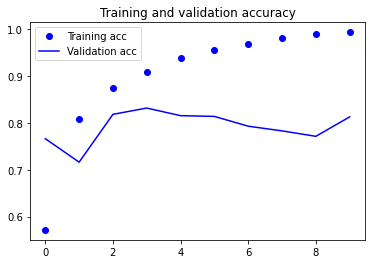

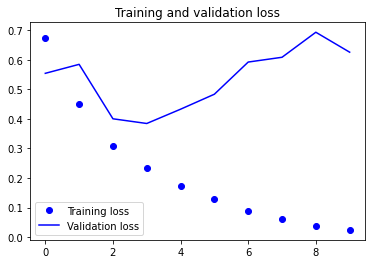

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Evaluate the model.
test_loss, test_acc = model.evaluate(input_test,y_test)
print('Test accuracy: %.3f' % test_acc)

782/782 [==============================] - 44s 56ms/step - loss: 0.6463 - acc: 0.8117
Test accuracy: 0.812


As a reminder, in chapter 3, our very first naive approach to this very dataset got us to 88% test accuracy. Unfortunately, our small 
recurrent network doesn't perform very well at all compared to this baseline (only up to 85% validation accuracy). Part of the problem is 
that our inputs only consider the first 500 words rather the full sequences -- 
hence our RNN has access to less information than our earlier baseline model. The remainder of the problem is simply that `SimpleRNN` isn't very good at processing long sequences, like text. Other types of recurrent layers perform much better. Let's take a look at some 
more advanced layers.

[...]

## A concrete LSTM example in Keras

Now let's switch to more practical concerns: we will set up a model using a LSTM layer and train it on the IMDB data. Here's the network, 
similar to the one with `SimpleRNN` that we just presented. We only specify the output dimensionality of the LSTM layer, and leave every 
other argument (there are lots) to the Keras defaults. Keras has good defaults, and things will almost always "just work" without you 
having to spend time tuning parameters by hand.

In [ ]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 16s 90ms/step - loss: 0.4881 - acc: 0.7707 - val_loss: 0.3808 - val_acc: 0.8484
Epoch 2/10
157/157 [==============================] - 14s 86ms/step - loss: 0.2824 - acc: 0.8909 - val_loss: 0.3444 - val_acc: 0.8502
Epoch 3/10
157/157 [==============================] - 14s 86ms/step - loss: 0.2338 - acc: 0.9117 - val_loss: 0.3647 - val_acc: 0.8460
Epoch 4/10
157/157 [==============================] - 13s 86ms/step - loss: 0.1969 - acc: 0.9269 - val_loss: 0.3992 - val_acc: 0.8458
Epoch 5/10
157/157 [==============================] - 14s 86ms/step - loss: 0.1741 - acc: 0.9367 - val_loss: 0.4648 - val_acc: 0.8502
Epoch 6/10
157/157 [==============================] - 14s 86ms/step - loss: 0.1556 - acc: 0.9470 - val_loss: 0.3244 - val_acc: 0.8544
Epoch 7/10
157/157 [==============================] - 13s 86ms/step - loss: 0.1393 - acc: 0.9510 - val_loss: 0.3451 - val_acc: 0.8682
Epoch 8/10
157/157 [==============================] - 14s 87ms

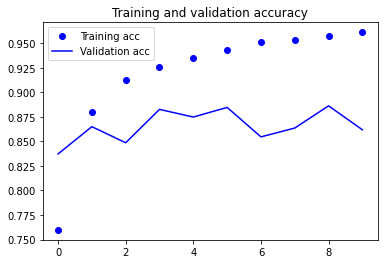

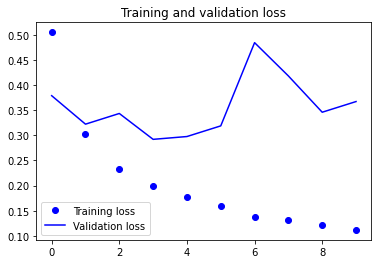

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Evaluate the model.
test_loss, test_acc = model.evaluate(input_test,y_test)
print('Test accuracy: %.3f' % test_acc)

782/782 [==============================] - 23s 30ms/step - loss: 0.5678 - acc: 0.8324
Test accuracy: 0.832


#en egen större LSTM (LSTM(128))

In [ ]:
from keras.layers import LSTM

model128 = Sequential()
model128.add(Embedding(max_features, 32))
model128.add(LSTM(128))
model128.add(Dense(1, activation='sigmoid'))

model128.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model128.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 29s 161ms/step - loss: 0.6303 - acc: 0.6748 - val_loss: 0.4985 - val_acc: 0.7536
Epoch 2/10
157/157 [==============================] - 25s 156ms/step - loss: 0.3768 - acc: 0.8405 - val_loss: 0.3334 - val_acc: 0.8604
Epoch 3/10
157/157 [==============================] - 25s 158ms/step - loss: 0.3128 - acc: 0.8767 - val_loss: 0.3027 - val_acc: 0.8762
Epoch 4/10
157/157 [==============================] - 25s 158ms/step - loss: 0.2401 - acc: 0.9097 - val_loss: 0.5357 - val_acc: 0.8128
Epoch 5/10
157/157 [==============================] - 25s 156ms/step - loss: 0.2171 - acc: 0.9202 - val_loss: 0.3881 - val_acc: 0.8280
Epoch 6/10
157/157 [==============================] - 25s 157ms/step - loss: 0.1894 - acc: 0.9316 - val_loss: 0.4187 - val_acc: 0.8620
Epoch 7/10
157/157 [==============================] - 25s 157ms/step - loss: 0.1720 - acc: 0.9376 - val_loss: 0.3077 - val_acc: 0.8820
Epoch 8/10
157/157 [==============================] - 2

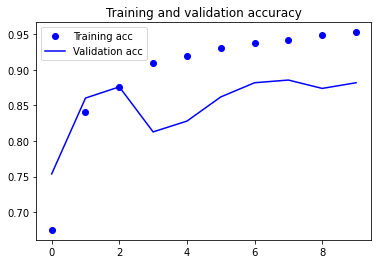

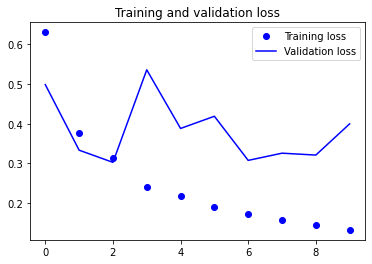

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Evaluate the model.
test_loss, test_acc = model128.evaluate(input_test,y_test)
print('Test accuracy: %.3f' % test_acc)

782/782 [==============================] - 29s 37ms/step - loss: 0.4635 - acc: 0.8624
Test accuracy: 0.862


##BiLSTM(32)

In [ ]:
from keras.layers import LSTM, Bidirectional

model = Sequential()
model.add(Embedding(max_features, 32))
#model.add(LSTM(32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 36s 189ms/step - loss: 0.5372 - acc: 0.7365 - val_loss: 0.3699 - val_acc: 0.8548
Epoch 2/10
157/157 [==============================] - 29s 184ms/step - loss: 0.3036 - acc: 0.8796 - val_loss: 0.2938 - val_acc: 0.8822
Epoch 3/10
157/157 [==============================] - 29s 184ms/step - loss: 0.2386 - acc: 0.9119 - val_loss: 0.8883 - val_acc: 0.7520
Epoch 4/10
157/157 [==============================] - 29s 184ms/step - loss: 0.2034 - acc: 0.9265 - val_loss: 0.4039 - val_acc: 0.8300
Epoch 5/10
157/157 [==============================] - 29s 183ms/step - loss: 0.1824 - acc: 0.9346 - val_loss: 0.3335 - val_acc: 0.8818
Epoch 6/10
157/157 [==============================] - 29s 183ms/step - loss: 0.1595 - acc: 0.9423 - val_loss: 0.5525 - val_acc: 0.8370
Epoch 7/10
157/157 [==============================] - 29s 184ms/step - loss: 0.1432 - acc: 0.9491 - val_loss: 0.3347 - val_acc: 0.8746
Epoch 8/10
157/157 [==============================] - 2

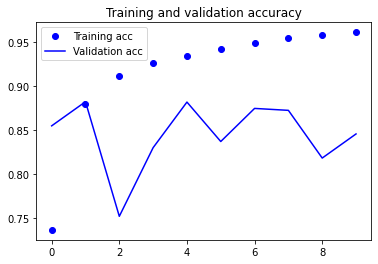

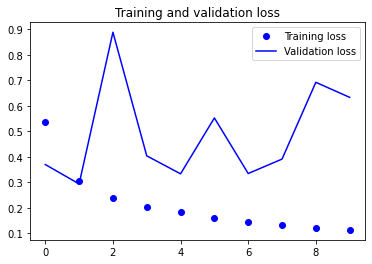

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Evaluate the model.
test_loss, test_acc = model.evaluate(input_test,y_test)
print('Test accuracy: %.3f' % test_acc)

782/782 [==============================] - 51s 65ms/step - loss: 0.7604 - acc: 0.8140
Test accuracy: 0.814


##Analys

simpleRNN - test accuracy: 0.812

LSTM(32) - test accuracy: 0.832

LSTM(128) - test accuracy: 0.862

BiLSTM(32) - test accuracy: 0.814 

Modellen som gav bäst test accuracy var alltså LSTM(128), så det är den modellen jag valde att fortsätta med. 


##fortsätter träningen av LSTM(128)

In [ ]:
from keras.layers import LSTM
from keras.layers import Dense
import tensorflow as tf

model128 = Sequential()
model128.add(Embedding(max_features, 32))
model128.add(LSTM(128))
model128.add(Dense(1, activation='sigmoid'))

model128.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

#early stop
es = tf.keras.callbacks.EarlyStopping('val_loss', patience=5, restore_best_weights = True)


history = model128.fit(input_train, y_train,
                    epochs=25,
                    batch_size=128,
                    callbacks=[es], 
                    validation_split=0.2)

Epoch 1/25
157/157 [==============================] - 13s 38ms/step - loss: 0.5536 - acc: 0.7300 - val_loss: 0.5577 - val_acc: 0.6930
Epoch 2/25
157/157 [==============================] - 5s 34ms/step - loss: 0.3508 - acc: 0.8522 - val_loss: 0.3624 - val_acc: 0.8438
Epoch 3/25
157/157 [==============================] - 5s 34ms/step - loss: 0.2892 - acc: 0.8900 - val_loss: 0.4302 - val_acc: 0.8054
Epoch 4/25
157/157 [==============================] - 5s 34ms/step - loss: 0.2424 - acc: 0.9083 - val_loss: 0.3670 - val_acc: 0.8706
Epoch 5/25
157/157 [==============================] - 5s 34ms/step - loss: 0.2064 - acc: 0.9218 - val_loss: 0.3023 - val_acc: 0.8840
Epoch 6/25
157/157 [==============================] - 5s 34ms/step - loss: 0.1858 - acc: 0.9334 - val_loss: 0.3181 - val_acc: 0.8792
Epoch 7/25
157/157 [==============================] - 5s 34ms/step - loss: 0.1763 - acc: 0.9385 - val_loss: 0.3033 - val_acc: 0.8882
Epoch 8/25
157/157 [==============================] - 6s 36ms/step -

In [ ]:
test_loss, test_acc = model128.evaluate(input_test,y_test)
print('Test accuracy: %.3f' % test_acc)

782/782 [==============================] - 9s 11ms/step - loss: 0.3246 - acc: 0.8765
Test accuracy: 0.877


## Test meningar

In [ ]:
test_sentences = [
  "That movie was absolutely awful",
  "The acting was a bit lacking",
  "The film was creative and surprising",
  "Absolutely fantastic!",
  "This movie is not worth the money",
  "The only positive thing with this movie is the music"
]

In [ ]:
# Code to prepare test sentencies for models trained with IMDB data
# Fetch tokenizer and pad_sequences from keras.preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set up tokenizer based on IMDB wordlist
index_offset = 3
tokenizer = Tokenizer()
word_to_id = imdb.get_word_index()
word_to_id = {k: (v + index_offset) for k, v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
tokenizer.word_index = word_to_id

# Prepare test sentences
test_seq = tokenizer.texts_to_sequences(test_sentences)
test_seq_padded = pad_sequences(test_seq, maxlen=maxlen)

# See what the model say about the test sentences
print(model128.predict(test_seq_padded))

[[0.06080922]
 [0.52382326]
 [0.76462406]
 [0.814186  ]
 [0.50325894]
 [0.40215793]]


# Analys av exempel meningarna 
modellen är väldigt säker på meningarna 1,3 och 4 alltså
"That movie was absolutely awful", "The film was creative and surprising" &  "Absolutely fantastic!"
vilket känns ganska rimligt då dessa recensionerna är väldigt tydliga i deras budskap. Jag skulle också säga att modellen tolkar dem rätt.

Den sista meningen tolkas också rätt, men modellen är inte lika säker där.

meningarna som modellen hade svårt för var:  

>"This movie is not worth the money" och "The acting was a bit lacking",

Modellen är osäker då resultatet är väldigt nära 0.5 (alltså mitt imellan 0 och 1) 

Den första av dem här två meningarna är ganska uppenbart en negativ recension, men modellen skulle säga att den är (marginellt) mer possitiv än negativ.    

Den andra recensionen är mer svårtolkad "The acting was a bit lacking" säger inte så mycket om filmen som helhet, bara att en del av den kunde varit bättre, alltså är det förståligt att modellen har problem med denna. 

jag tyckte att det var intressant att modellen hade svårt för "This movie is not worth the money" så jag testade några andra liknande meningar för att se lite tydligare vad i den här meningen som gör att den är svårtolkad för modellen.

In [ ]:
test_sentences2 = [
  "This movie is worth the money",
  "worth the money",
  "not worth the money",
  "This movie is not worth the money",
  "This movie is good",
  "This movie is not good",
  "This movie is not good at all"
]

In [ ]:
# Set up tokenizer based on IMDB wordlist
index_offset = 3
tokenizer = Tokenizer()
word_to_id = imdb.get_word_index()
word_to_id = {k: (v + index_offset) for k, v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
tokenizer.word_index = word_to_id

# Prepare test sentences
test_seq = tokenizer.texts_to_sequences(test_sentences2)
test_seq_padded = pad_sequences(test_seq, maxlen=maxlen)

# See what the model say about the test sentences
print(model128.predict(test_seq_padded))

[[0.59422964]
 [0.59307045]
 [0.5059869 ]
 [0.50325894]
 [0.805239  ]
 [0.72351724]
 [0.76634586]]


Modellen verkar ha problem med att tolka 'not' och hur det påverkar innebörden av meningarna, så recensioner som "This movie is **not** good" och "This movie is **not** worth the money" tolkas som positiva.